# DBTL 0.4 data analysis

This notebook analyzes OD340 and OD600 data from DBTL cycle 0.1 of flaviolin producing P. putida.

## Inputs and outputs

#### Required file to run this notebook:
   - edd slug


#### File generated by running this notebook:
   
 
    
The files are stored in the user defined directory.

## Setup

Importing needed libraries:

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from random import sample

import edd_utils as eddu

### User parameters

In [78]:
CYCLE = 0.5

user_params = {
    'output_file_path': f'../data/flaviolin/DBTL{CYCLE}', # Folder for output files,
    'study_slug': 'combinatorial-media-for-flaviolin-dbtl05',
    'edd_server': 'edd.jbei.org',
    'username': 'tradivojevic',
    } 

In [79]:
study_slug = user_params['study_slug']
edd_server = user_params['edd_server']
username = user_params['username']

## Load the study

In [4]:
try:
  session = eddu.login(edd_server=edd_server, user=username)
except:
  print('ERROR! Connection to EDD failed. We will try to load data from disk...')
else:
  print('OK! Connection to EDD successful. We will try to load data from EDD...')

Password for tradivojevic:  ··············


OK! Connection to EDD successful. We will try to load data from EDD...


In [80]:
df: pd.DataFrame
    
try:
    df = eddu.export_study(session, study_slug, edd_server=edd_server)
except (NameError, AttributeError, KeyError):
    try:
        df = pd.read_csv(user_params['study_file'])
    except:
        print(f'ERROR! Alternative loading of data from disk failed!')
    else:
        print(f'OK! Alternative loading of data from disk was successful.')


  0%|          | 0/96 [00:00<?, ?it/s]

In [81]:
df.head()

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,148059,Combinatorial media for flaviolin DBTL0.5,148060,C0.5_WA1_biomek-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,148108,C0.5_WA1_biomek-R1,NaN,Optical Density,0,NaN,0.2068,48.0
1,148059,Combinatorial media for flaviolin DBTL0.5,148061,C0.5_WB1_biomek-R2,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,148109,C0.5_WB1_biomek-R2,NaN,Optical Density,0,NaN,0.2099,48.0
2,148059,Combinatorial media for flaviolin DBTL0.5,148062,C0.5_WC1_biomek-R3,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,148110,C0.5_WC1_biomek-R3,NaN,Optical Density,0,NaN,0.2110,48.0
3,148059,Combinatorial media for flaviolin DBTL0.5,148063,C0.5_WD1_biomek-R4,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,148111,C0.5_WD1_biomek-R4,NaN,Optical Density,0,NaN,0.2114,48.0
4,148059,Combinatorial media for flaviolin DBTL0.5,148064,C0.5_WE1_biomek-R5,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,148112,C0.5_WE1_biomek-R5,NaN,Optical Density,0,NaN,0.2126,48.0


Drop unnecessary columns:

In [82]:
df = df.loc[:,['Line Name','Line Description','Protocol','Value']]
df.head()

,Line Name,Line Description,Protocol,Value
0,C0.5_WA1_biomek-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.2068
1,C0.5_WB1_biomek-R2,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.2099
2,C0.5_WC1_biomek-R3,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.2110
3,C0.5_WD1_biomek-R4,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.2114
4,C0.5_WE1_biomek-R5,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.2126


In [83]:
find_row = lambda x: x['Line Name'][6]
find_col = lambda x: x['Line Name'][7]
find_type = lambda x: x['Line Name'][9:15]

In [84]:
df['Row'] =  df.apply(find_row, axis=1)
df['Column'] =  df.apply(find_col, axis=1)
df['Type'] =  df.apply(find_type, axis=1)

In [85]:
df.head()

,Line Name,Line Description,Protocol,Value,Row,Column,Type
0,C0.5_WA1_biomek-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.2068,A,1,biomek
1,C0.5_WB1_biomek-R2,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.2099,B,1,biomek
2,C0.5_WC1_biomek-R3,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.2110,C,1,biomek
3,C0.5_WD1_biomek-R4,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.2114,D,1,biomek
4,C0.5_WE1_biomek-R5,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.2126,E,1,biomek


## Coefficient of variation

In [86]:
stats = df.groupby(['Protocol', 'Type']).mean()
stats.rename(columns={'Value': 'mean'}, inplace=True)
stats['std'] = df.groupby(['Protocol', 'Type']).std()
stats['CV[%]'] = 100* stats['std'] / stats['mean']
stats

mean       std      CV[%]
Protocol Type                                 
OD340    biomek  0.183450  0.081053  44.182614
         manual  0.210350  0.004470   2.125028
OD600    biomek  0.279417  0.172364  61.687213
         manual  0.166792  0.025475  15.273299

## Visualization

### Biomek vs manual media

Visualize differences between the manual and biomek prepared media

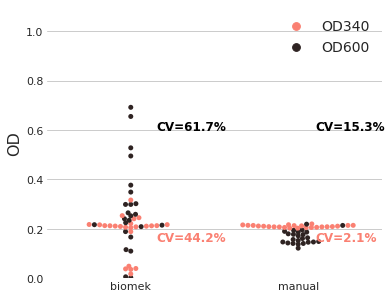

In [106]:
fig, ax = plt.subplots(figsize=(6, 5))
fontsize = 16
sns.set_style("whitegrid")
sns.set(font_scale = 1)
# plt.style.use('seaborn-whitegrid')
sns.swarmplot(data=df, 
              linewidth=0,
              x='Type',
              y='Value',
              hue='Protocol',
              palette="dark:salmon_r"
              )
plt.legend(fontsize=fontsize-2)
sns.despine(left=True, bottom=True)
ax.set_ylabel("OD", fontsize=fontsize)
ax.set_xlabel(None)
plt.ylim([0, 1.1])
plt.text(0.15, 0.6, 
         f"CV={stats.loc['OD600','biomek']['CV[%]']:.3}%", 
         horizontalalignment='left', 
#          size='small', 
         color='black', 
        weight='semibold')
plt.text(1.1, 0.6, 
         f"CV={stats.loc['OD600','manual']['CV[%]']:.3}%", 
         horizontalalignment='left', 
#          size='small', 
         color='black', 
        weight='semibold')
plt.text(0.15, 0.15, 
         f"CV={stats.loc['OD340','biomek']['CV[%]']:.3}%", 
         horizontalalignment='left', 
         color='salmon', 
#          size='small',
         weight='semibold'
        )
plt.text(1.1, 0.15, 
         f"CV={stats.loc['OD340','manual']['CV[%]']:.2}%", 
         horizontalalignment='left', 
         color='salmon', 
#          size='small',
         weight='semibold'
        )

fig.savefig(
    f"{user_params['output_file_path']}/swarm_both.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

### Plot OD measurements per well

In [62]:
data_od600 = df[df['Protocol']=='OD600'].pivot('Row', 'Column')['Value']
data_od340 = df[df['Protocol']=='OD340'].pivot('Row', 'Column')['Value']

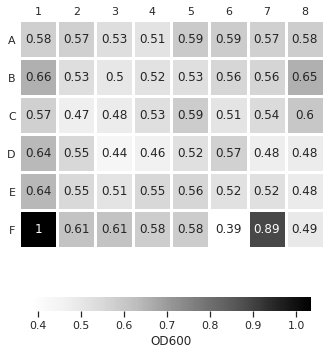

In [63]:
fig = plt.figure(figsize=(10,6))
sns.set(font_scale = 1)
ax = sns.heatmap(data=data_od600, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap="Greys", #Greys, YlGn
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.5,
                           'label': 'OD600'
                          },
                 annot = True,
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation = 0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD600.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

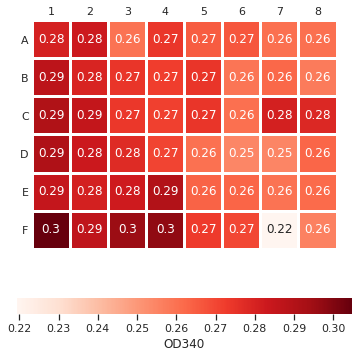

In [64]:
fig = plt.figure(figsize=(10,6))
colormap = sns.color_palette("light:salmon", as_cmap=True)
colormap = "Reds"
sns.set_context("notebook", font_scale=1., rc={"lines.linewidth": 2.5})
ax = sns.heatmap(data_od340, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap=colormap,
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.6,
                           'label': 'OD340'
                          },
                 annot = True,
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD340.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

# Sample size calculation (clean up)

In [65]:
cv =  lambda x: np.std(x) / np.mean(x)


In [66]:
def find_coeff_var(samples):
    samples = list(samples)
    dim = len(samples)
    n_start = 3
    n_end = dim + 1
    coeff_var_avg = np.zeros(n_end-n_start)
    coeff_var_std = np.zeros(n_end-n_start)
    n = 0
    for num_samples in (range(n_start, n_end)):
        # Repeat 100 times and average
        coeff_var = np.zeros(100)
        for i in range(100):
            # Draw num_samples from all
            current_samples = sample(samples, num_samples)
            coeff_var[i] = cv(current_samples)
        coeff_var_avg[n] = np.mean(coeff_var)
        coeff_var_std[n] = np.std(coeff_var)
        n += 1
        
    return coeff_var_avg, coeff_var_std

### Manual

In [67]:
samples_man = df[(df['Type']=='manual') & (df['Protocol']=='OD340')]['Value']
coeff_var_avg_man, coeff_var_std_man = find_coeff_var(samples_man)


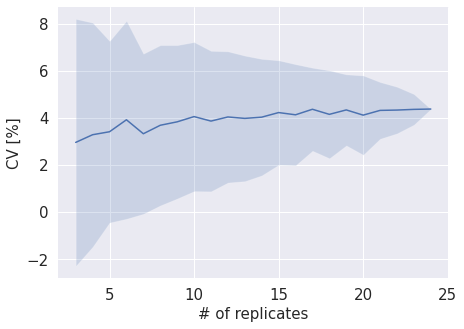

In [105]:
num_samples = range(3, len(samples_man)+1)
fig, ax = plt.subplots(figsize=(7, 5))
plt.style.use('seaborn-whitegrid') # seaborn-whitegrid, ggplot
sns.despine(left=True, bottom=True)
fontsize = 15
plt.plot(num_samples, 100*coeff_var_avg_man)
plt.fill_between(num_samples, 
                 100*coeff_var_avg_man-1.96*100*coeff_var_std_man, 
                 100*coeff_var_avg_man+1.96*100*coeff_var_std_man,
                 alpha=0.2)
plt.tick_params(axis="both", which="major", labelsize=fontsize)
ax.set_xlabel("# of replicates", fontsize=fontsize)
ax.set_ylabel("CV [%]", fontsize=fontsize)
# ax.set_ylim([0, 10])
fig.savefig(
    f"{user_params['output_file_path']}/CV_manual.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

## Biomek

In [69]:
samples_biom = df[(df['Type']=='biomek') & (df['Protocol']=='OD340')]['Value']
coeff_var_avg_biom, coeff_var_std_biom = find_coeff_var(samples_biom)


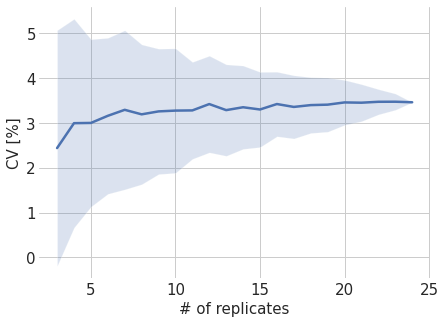

In [70]:
num_samples = range(3, len(samples_biom)+1)

fig, ax = plt.subplots(figsize=(7, 5))
plt.style.use('seaborn-whitegrid') # seaborn-whitegrid, ggplot
sns.despine(left=True, bottom=True)
fontsize = 15
plt.plot(num_samples, 100*coeff_var_avg_biom)
plt.fill_between(num_samples, 
                 100*coeff_var_avg_biom-1.96*100*coeff_var_std_biom, 
                 100*coeff_var_avg_biom+1.96*100*coeff_var_std_biom,
                 alpha=0.2)
plt.tick_params(axis="both", which="major", labelsize=fontsize)
ax.set_xlabel("# of replicates", fontsize=fontsize)
ax.set_ylabel("CV [%]", fontsize=fontsize)
# ax.set_ylim([0, 10])
fig.savefig(
    f"{user_params['output_file_path']}/CV_biomek.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

## Both

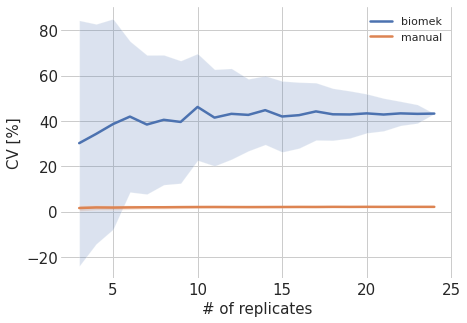

In [29]:
num_samples = range(3, len(samples_biom)+1)

fig, ax = plt.subplots(figsize=(7, 5))
plt.style.use('seaborn-whitegrid') # seaborn-whitegrid, ggplot
sns.despine(left=True, bottom=True)
fontsize = 15
plt.plot(num_samples, 100*coeff_var_avg_biom,
        label='biomek')
plt.fill_between(num_samples, 
                 100*coeff_var_avg_biom-1.96*100*coeff_var_std_biom, 
                 100*coeff_var_avg_biom+1.96*100*coeff_var_std_biom,
                 alpha=0.2)
plt.plot(num_samples, 100*coeff_var_avg_man,
        label='manual')
plt.fill_between(num_samples, 
                 100*coeff_var_avg_man-1.96*100*coeff_var_std_man, 
                 100*coeff_var_avg_man+1.96*100*coeff_var_std_man,
                 alpha=0.2)
plt.legend()
plt.tick_params(axis="both", which="major", labelsize=fontsize)
ax.set_xlabel("# of replicates", fontsize=fontsize)
ax.set_ylabel("CV [%]", fontsize=fontsize)
# ax.set_ylim([0, 10])
fig.savefig(
    f"{user_params['output_file_path']}/CV_both.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)